# [GD-4]NewsMulticlassClassification

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## 1. 모든 단어 사용

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, 
                                                         test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


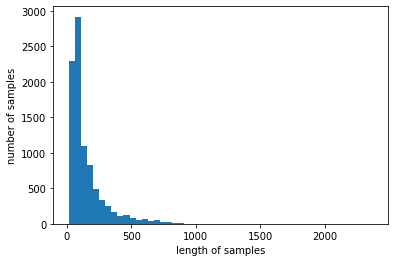

In [3]:
# 데이터 분포 파악
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

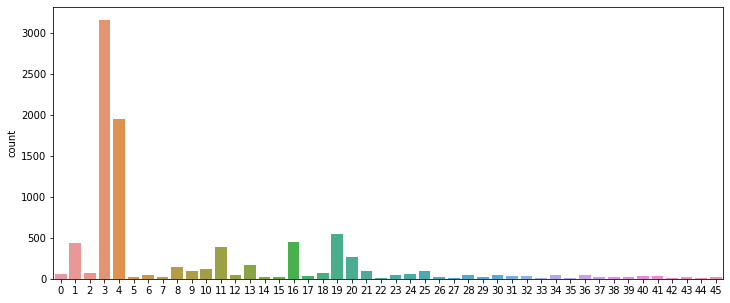

In [4]:
# 타겟데이터 파악
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [5]:
# 텍스트 데이터로 복원
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 인덱스 +3
index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에서 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk> 로 설정
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

565248/550378 [==============================] - 0s 0us/step


In [6]:
# 전체 학습데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
    
x_train = decoded

In [7]:
# 전체 테스트데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)
    
x_test = decoded

In [8]:
# DTM 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 테스트 데이터
x_test_dtm = dtmvector.transform(x_test)  # 테스트 데이터를 DTM 으로 변환

(8982, 26506)


In [9]:
# TF-IDF Matrix 확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 테스트 데이터
tfidfv_test = tfidf_transformer.transform(x_test_dtm)  # DTM을 TF-ODF 행렬로 변환

(8982, 26506)


## 모델별 정확도 예측

In [10]:
# 결과값 비교를 위한 리스트 선언
classifier_list = ["MultinomialNB", "ComplementNB", "Logistic Regression", "LinearSVC", "Decision Tree", "Random Forest", "GradientBoostingClassifier", "Voting"]
classifier_answer_list = []

### 나이브 베이즈 분류기

In [11]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도 :", accuracy_score(y_test, predicted))  # 예측값과 실제값 비교

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.5997328584149599


### Complement Naive Bayes Classifier(CNB)

In [12]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.7649154051647373


### 로지스틱 회귀

In [13]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.813446126447017


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 선형 서포트 벡터 머신

In [14]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.782279608192342


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 결정 트리

In [15]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6211041852181657


### 랜덤 포레스트

In [16]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6544968833481746


### 그래디언트 부스팅 트리

In [17]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.7702582368655387


### 보팅(로지스틱 회귀, CNB, 그래디언트 부스팅 트리 세 가지 사용)

In [19]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도 : 0.8187889581478184


### 전체 결과 & f1 score

In [20]:
# 전체 결과 비교

print("빈도수 제한없을 때 정확도 리스트\n")

for x in range(len(classifier_list)):
    print(classifier_list[x], ":", classifier_answer_list[x].round(2))


빈도수 제한없을 때 정확도 리스트

MultinomialNB : 0.6
ComplementNB : 0.76
Logistic Regression : 0.81
LinearSVC : 0.78
Decision Tree : 0.62
Random Forest : 0.65
GradientBoostingClassifier : 0.77
Voting : 0.82


In [23]:
# f1 score 알아보기
#from sklearn.metrics import f1_score

predicted = voting_classifier.predict(tfidfv_test)
# print("f1 score :", f1_score(y_test, predicted, average='micro'))
print("f1 score :", classification_report(y_test, predicted, zero_division=0))

f1 score :               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.77      0.79       105
           2       0.67      0.80      0.73        20
           3       0.93      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.67      0.71      0.69        83
          12       0.60      0.46      0.52        13
          13       0.69      0.65      0.67        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.73      0.76      0.74        99
          17    

## 2. 빈도수 상위 5000개의 단어만 사용

In [27]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, 
                                                         test_split=0.2)

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


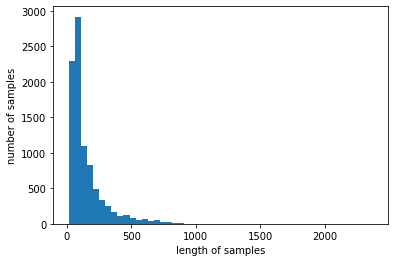

In [28]:
# 데이터 분포 파악
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

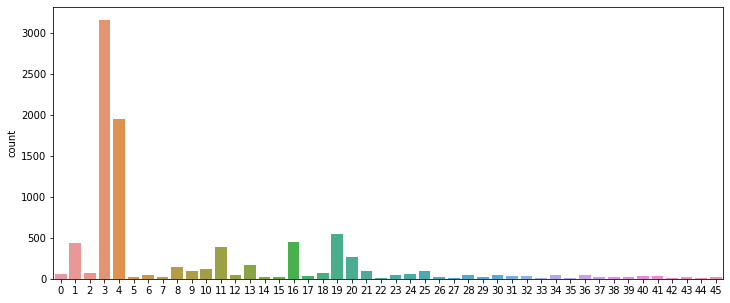

In [29]:
# 타겟데이터 파악
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [30]:
# 텍스트 데이터로 복원
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 인덱스 +3
index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에서 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk> 로 설정
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [31]:
# 전체 학습데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [32]:
# 전체 테스트데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [33]:
# DTM 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 테스트데이터
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환

(8982, 4867)


In [34]:
# TF-IDF Matrix확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 테스트데이터
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 4867)


## 모델별 정확도 예측

In [35]:
# 결과값 비교를 위한 리스트 선언
classifier_list = ["MultinomialNB", "ComplementNB", "Logistic Regression", "LinearSVC", "Decision Tree", "Random Forest", "GradientBoostingClassifier", "Voting"]
classifier_answer_list = []

### 나이브 베이즈 분류기

In [36]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도 :", accuracy_score(y_test, predicted))  # 예측값과 실제값 비교

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6731967943009796


### Complement Naive Bayes Classifier(CNB)

In [37]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.7707034728406055


### 로지스틱 회귀

In [38]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.8058771148708815


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 선형 서포트 벡터 머신

In [39]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.7733748886910062


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 결정 트리

In [40]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6179875333926982


### 랜덤 포레스트

In [41]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.701246660730187


### 그래디언트 부스팅 트리

In [42]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.767586821015138


### 보팅(로지스틱 회귀, CNB, 그래디언트 부스팅 트리 세 가지 사용)

In [43]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도 : 0.8161175422974176


### 전체 결과 & f1 score

In [44]:
# 전체 결과 비교

print("빈도수 상위 5000개의 단어만 사용했을 때 정확도 리스트\n")

for x in range(len(classifier_list)):
    print(classifier_list[x], ":", classifier_answer_list[x].round(2))

빈도수 상위 5000개의 단어만 사용했을 때 정확도 리스트

MultinomialNB : 0.67
ComplementNB : 0.77
Logistic Regression : 0.81
LinearSVC : 0.77
Decision Tree : 0.62
Random Forest : 0.7
GradientBoostingClassifier : 0.77
Voting : 0.82


In [45]:
# f1 score 알아보기
#from sklearn.metrics import f1_score

predicted = voting_classifier.predict(tfidfv_test)
# print("f1 score :", f1_score(y_test, predicted, average='micro'))
print("f1 score :", classification_report(y_test, predicted, zero_division=0))

f1 score :               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.77      0.79       105
           2       0.71      0.85      0.77        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.67      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.68      0.62      0.65        37
          14       0.12      0.50      0.20         2
          15       0.67      0.44      0.53         9
          16       0.74      0.74      0.74        99
          17    

## 3. 직접 단어 갯수를 설정해서 사용 (2000개)

In [46]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=2000, 
                                                         test_split=0.2)

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


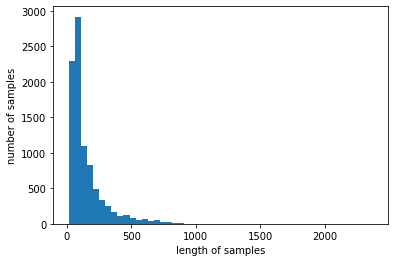

In [47]:
# 데이터 분포 파악
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

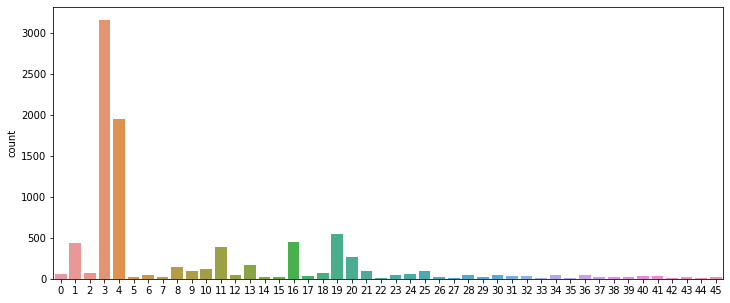

In [49]:
# 타겟데이터 파악
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [50]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [51]:
# 텍스트 데이터로 복원
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 인덱스 +3
index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에서 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk> 로 설정
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [52]:
# 전체 학습데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [53]:
# 전체 테스트데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)
    
x_test = decoded

In [60]:
x_train[:2]

['<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> <unk> de <unk> <unk> lt <unk> <unk> and lt <unk> overseas corp of chicago have each taken 50 pct <unk> in <unk> company <unk> <unk> factors <unk> de <unk> said in a statement it gave no financial details of the transaction <unk> <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3']

In [59]:
x_test[:2]

['<sos> the great <unk> and pacific <unk> co said its three year <unk> mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations <unk> 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the <unk> capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> <unk> sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the current <unk

In [54]:
# DTM 확인
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# 테스트 데이터
x_test_dtm = dtmvector.transform(x_test)  # 테스트 데이터를 DTM 으로 변환

(8982, 1944)


In [55]:
# TF-IDF Matrix확인
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

# 테스트데이터
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 1944)


## 모델별 정확도 예측

In [61]:
# 결과값 비교를 위한 리스트 선언
classifier_list = ["MultinomialNB", "ComplementNB", "Logistic Regression", "LinearSVC", "Decision Tree", "Random Forest", "GradientBoostingClassifier", "Voting"]
classifier_answer_list = []

### 나이브 베이즈 분류기

In [62]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도 :", accuracy_score(y_test, predicted))  # 예측값과 실제값 비교

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6914514692787177


### Complement Naive Bayes Classifier(CNB)

In [63]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.7569011576135352


### 로지스틱 회귀

In [64]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.7813891362422084


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 선형 서포트 벡터 머신

In [65]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.732413178984862


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 결정 트리

In [66]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6255565449688335


### 랜덤 포레스트

In [67]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.6954585930543188


### 그래디언트 부스팅 트리

In [68]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

정확도 : 0.757346393588602


### 보팅(로지스틱 회귀, CNB, 그래디언트 부스팅 트리 세 가지 사용)

In [69]:
voting_classifier = VotingClassifier(estimators=[
    ('lr', LogisticRegression(C=10000, penalty='l2')),
    ('cb', ComplementNB()),
    ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test)
print("정확도 :", accuracy_score(y_test, predicted))

classifier_answer_list.append(accuracy_score(y_test, predicted))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도 : 0.7978628673196795


### 전체 결과 & f1 score

In [70]:
# 전체 결과 비교

print("빈도수 상위 2000개의 단어만 사용했을 때 정확도 리스트\n")

for x in range(len(classifier_list)):
    print(classifier_list[x], ":", classifier_answer_list[x].round(2))

빈도수 상위 2000개의 단어만 사용했을 때 정확도 리스트

MultinomialNB : 0.69
ComplementNB : 0.76
Logistic Regression : 0.78
LinearSVC : 0.73
Decision Tree : 0.63
Random Forest : 0.7
GradientBoostingClassifier : 0.76
Voting : 0.8


In [71]:
# f1 score 알아보기
#from sklearn.metrics import f1_score

predicted = voting_classifier.predict(tfidfv_test)
# print("f1 score :", f1_score(y_test, predicted, average='micro'))
print("f1 score :", classification_report(y_test, predicted, zero_division=0))

f1 score :               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.73      0.75       105
           2       0.68      0.75      0.71        20
           3       0.92      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       0.50      0.20      0.29         5
           6       0.81      0.93      0.87        14
           7       0.33      0.33      0.33         3
           8       0.76      0.74      0.75        38
           9       0.77      0.80      0.78        25
          10       0.86      0.83      0.85        30
          11       0.63      0.67      0.65        83
          12       0.56      0.38      0.45        13
          13       0.58      0.68      0.63        37
          14       0.40      1.00      0.57         2
          15       0.50      0.22      0.31         9
          16       0.71      0.74      0.72        99
          17    

## 4. 딥러닝 모델과 비교

In [72]:
from tensorflow import keras
import numpy as np

In [87]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, 
                                                                         test_split=0.2)

In [88]:
print(train_data.shape, train_labels.shape)

(8982,) (8982,)


In [89]:
print(test_data.shape, test_labels.shape)

(2246,) (2246,)


In [90]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [91]:
# 원핫인코딩을 해줍시다
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [92]:
model = keras.Sequential()

model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu')) 
model.add(keras.layers.Dense(46, activation='softmax'))  # 클래스가 46개

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [93]:
# 모델 컴파일 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
# 데이터 나누기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [95]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 3.2287 - accuracy: 0.3847 - val_loss: 2.4565 - val_accuracy: 0.5350
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.9332 - accuracy: 0.6134 - val_loss: 1.6107 - val_accuracy: 0.6640
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.3417 - accuracy: 0.7169 - val_loss: 1.2919 - val_accuracy: 0.7010
Epoch 4/20
16/16 [==============================] - 1s 54ms/step - loss: 1.0424 - accuracy: 0.7702 - val_loss: 1.1346 - val_accuracy: 0.7490
Epoch 5/20
16/16 [==============================] - 1s 55ms/step - loss: 0.8316 - accuracy: 0.8206 - val_loss: 1.0373 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6591 - accuracy: 0.8652 - val_loss: 0.9686 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 54ms/step - loss: 0.5157 - accuracy: 0.8951 - val_loss: 0.9155 - val_accuracy: 0.8120
Epoch 8/20
16

In [96]:
# 모델 평가
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.1233 - accuracy: 0.7912


[1.1232805252075195, 0.7911843061447144]

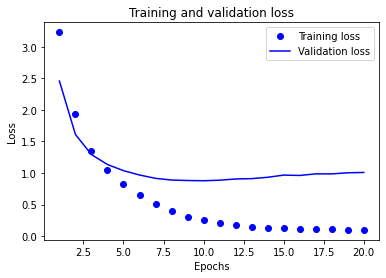

In [97]:
# 시각화
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 회고

* accuracy 비교

|   | 나이브 베이즈 분류기 | CNB | 로지스틱 회귀 | 선형 서포트 벡터 머신 | 결정 트리 | 랜덤 포레스트 | 그래디언트 부스팅 트리 | 보팅 |
|---|---|---|---|---|---|---|---|---|
| None | 0.6 | 0.76 | 0.81 | 0.78 | 0.62 | 0.65 | 0.77 | 0.82 |
| 5000 | 0.67 | 0.77 | 0.81 | 0.77 | 0.62 | 0.7 | 0.77 | 0.82 |
| 2000 | 0.69 | 0.76 | 0.78 | 0.73 | 0.63 | 0.7 | 0.76 | 0.8 |

- 8개의 머신러닝 기법 중 가장 결과가 좋은 것은 보팅이었다. 하지만 시간이 꽤 오래 걸렸다.
- 시간을 절약하고 싶다면 로지스틱 회귀를 사용해도 무관할 것이다.
- num_words 변경에 따른 결과를 보면 크게 차이는 없지만, 5000 이상으로 설정하였을 때 결과가 향상될 것으로 예상한다.
- 나이브 베이즈 분류기는 feature 간의 독립성이 중요하다고 한다. 그렇지만 num_words 가 감소할수록 acuuracy가 증가하는 이유는 모르겠다. 가지고 있는 단어의 개수가 줄어들수록 각 단어들의 연관성이 감소하는 것이 아닌지 추측해 본다.
- 딥러닝 결과 : loss 1.12 accuracy 0.79
- 딥러닝 모델의 결과는 머신러닝 결과보다 좋을 것으로 예상했지만 오히려 좋지 않았다. 데이터셋에 전처리 작업을 추가하면 성능이 향상 될것이다.

# 참고 사이트

[1.참고블로그](https://piaojian.tistory.com/36?category=857927)  
[2.참고깃허브](https://github.com/nevermet/AIFFEL/blob/master/G4_NewsCategoryClassification.ipynb)